In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('hello.txt',on_bad_lines='skip',sep='delimiter',header = None )

/tmp/ipykernel_930639/1508890268.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('hello.txt',on_bad_lines='skip',sep='delimiter',header = None )


# Question 1

In [4]:
x1 = len(data)
data1 = []
for i in range(x1):
        z1 = data.iloc[i][0]
        for j in z1.split():
            #print(j)
            data1.append(j)
#print(y1)
def remove_punctuation(string):
    punctuation_marks = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for i in string:  
        if i in punctuation_marks:  
            string = string.replace(i, "") 
    return string

data1 = [remove_punctuation(i) for i in data1] # cleaned list

In [5]:
#method to perform unicode correction.....
def get_unicode_corrected_word(incorrect_word):
    list_of_swar = ['अ','आ','इ','ई','उ','ऊ','ऋ','ए','ऐ','ओ','औ','अं','अः']
    list_of_matra = ['ऻ','ि','ी','ू','ृ','ॄ','ॅ','ॆ','े', 'ं', 'ै','ॉ','ॊ','ो','ौ','ॎ','ॏ','ु','ा']
    list_of_vyanjan = ['क','ख','ग','घ','च','छ','ज','झ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व','श','स','ष','ह','ष','त्र']
    dict_for_matra = {'ऻ':'आ','ि':'इ','ी':'ई','ू':'ऊ','ृ':'ऋ','े':'ए', 'ं':'अं', 'ै':'ऐ','ो':'ओ','ौ':'औ','ु':'उ','ा':'आ','ॄ':'ऋ','ॅ':'ॲ ','ॆ':'ऐ','ॉ':'ऑ','ॊ':'ऒ','ॎ':'ए','ॏ':'औ'}
    
    word = incorrect_word
    unicode_corrected_word = ""
    for i in range(len(word)):
        if word[i] in list_of_swar:
             unicode_corrected_word = unicode_corrected_word+' '+word[i]
        elif word[i] in list_of_vyanjan:
            unicode_corrected_word = unicode_corrected_word+' '+word[i]+'्'
            if i+1 <= len(word)-1 :
                if word[i+1]=='्' or word[i+1] in [',','_','|','-','(',')','[',']','!','?','"','{','}','^','*','%','/',':-','।','.','़']:
                    pass
                elif  word[i+1] in list_of_vyanjan or word[i+1] in list_of_swar:
                    unicode_corrected_word =  unicode_corrected_word+' '+'अ'
                elif word[i+1] in list_of_matra:
                    unicode_corrected_word = unicode_corrected_word+' '+dict_for_matra[word[i+1]]
            elif i == len(word) - 1:
                unicode_corrected_word = unicode_corrected_word + ' ' + 'अ'
        elif word[i] in list_of_matra:
            if word[i-1] in [',','_','|','-','(',')','[',']','!','?','"','{','}','^','*','%','/',':-','।','.','़']:
                unicode_corrected_word = unicode_corrected_word+' '+dict_for_matra[word[i]]
        i+=1      
    return unicode_corrected_word+''

In [6]:
#performing unicode correction on data......
list_of_corrected_words = []
for i in range(len(data1)):
    x = get_unicode_corrected_word(data1[i])
    list_of_corrected_words.append(x)

In [37]:
#displaying first 1000 unicode corrected words.....
print(list_of_corrected_words[:1000])

[' य् उ व् आ', ' उ द् य् अ म् ई', ' स् ट् आ र् ट् अ अ प् अ', ' क् ए', ' ज् अ र् इ ए', ' क् अ ई', ' य् उ व् आ ओ', ' क् ओ', ' र् ओ ज् अ ग् आ र् अ', ' प् र् अ द् आ न् अ', ' क् अ र् अ', ' स् अ क् अ त् ए', ' ह् ऐ', ' इ न् अ क् आ', ' र् ए व् ए न् य् ऊ', ' म् ऑ ड् अ ल् अ', '', ' म् ऑ ड् अ ल् अ', ' प् अ र् अ', ' ह् ओ ग् आ', ' आ ग् अ र् आ', ' स् ए', ' ह् आ ल् अ', ' ह् ई', ' ल् आ च् अ', ' ह् उ ए', ' स् ई न् य् ऊ ज् अ', ' च् ऐ न् अ ल् अ', ' म् ए', ' क् आ प् अ ड् ई', ' न् ए', ' इ ट् अ र् अ व् य् ऊ', ' म् ए', ' क् उ ब् ऊ ल् अ', ' क् अ र् अ', ' ह् ई', ' ल् इ य् आ', ' क् इ', ' य् अ श् अ व् अं त् अ', ' न् ए', ' क् आ प् अ ड् ई', ' स् ए', ' र् अं ग् अ द् आ र् ई', ' न् अ ह् ई', ' म् आ ग् ई', ' थ् ई', ' ब् अ ल् क् इ', ' य् अ श् अ व् अं त् अ', ' न् ए', ' क् आ प् अ ड् ई', ' स् ए', ' ब् ई स् अ', ' ह् अ ज् आ र् अ', ' क् ई', ' र् अ क् अ म् अ', ' उ ध् आ र् अ', ' क् ए', ' त् औ र् अ', ' प् अ र् अ', ' ए स् अ ए म् अ ए स् अ', ' क् अ र् अ', ' म् आ ग् ई', ' थ् ई', ' इ स् अ', ' च् ऐ न् अ ल् अ', ' क् ए', ' द् इ ल् ल् ई'

# Question - 2

In [38]:
# Getting a list of tokens....
x1 = len(data)
data1 = []
for i in range(x1):
        z1 = data.iloc[i][0]
        for j in z1.split():
            #print(j)
            data1.append(j)
#print(y1)
def remove_punctuation(string):
    punctuation_marks = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for i in string:  
        if i in punctuation_marks:  
            string = string.replace(i, "") 
    return string

data1 = [remove_punctuation(i) for i in data1] # cleaned list

#getting token along with their frequency in descending order...
token_frequency = {}

# iterating over the list
for item in data1:
   # checking the element in dictionary
    if item in token_frequency:
      # incrementing the count
      token_frequency[item] += 1
    else:
      # initializing the count
        token_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
sorted_token_frequency = ( sorted(token_frequency.items(), key=operator.itemgetter(1),reverse=True))
#print(sorted_token_frequency[0])


('के', 371332)


In [40]:
#1000 most frequent tokens...........
print(sorted_token_frequency[:1000])

[('के', 371332), ('में', 279947), ('की', 224324), ('को', 170450), ('से', 161338), ('है', 140975), ('और', 134371), ('का', 128650), ('ने', 119921), ('पर', 104159), ('है।', 103705), ('कि', 90537), ('भी', 75264), ('एक', 58102), ('लिए', 57361), ('इस', 55906), ('नहीं', 53968), ('हैं', 53078), ('कर', 52452), ('ही', 47405), ('', 41636), ('हो', 39475), ('तो', 39420), ('हैं।', 39022), ('यह', 36404), ('किया', 36292), ('करने', 34876), ('कहा', 34515), ('साथ', 29806), ('गया', 27156), ('बाद', 27112), ('अपने', 24313), ('रहे', 22342), ('तक', 22138), ('था', 22072), ('हुए', 21712), ('रहा', 20359), ('दिया', 19625), ('रही', 19371), ('उन्होंने', 19356), ('लेकिन', 19133), ('जा', 19064), ('जो', 18687), ('सरकार', 18486), ('वह', 17728), ('कुछ', 17102), ('पहले', 16664), ('होने', 15933), ('व', 15829), ('लोगों', 15385), ('कोई', 15075), ('वाले', 15023), ('अब', 14909), ('या', 14642), ('था।', 14612), ('करते', 14585), ('गई', 14501), ('अपनी', 14488), ('भारत', 14433), ('इसके', 14260), ('आप', 14057), ('पुलिस', 14021), ('

In [9]:
#getting a list of characters....
def get_charcters(data,data1):
    vyanjan = ['क','ख','ग','घ','च','छ','ज','झ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व','श','स','ष','ह','ष','त्र']

    
    y = ''
    list_of_characters = []
    dict = {}
    for j in range(len(data)):
        x = data[j]
        token_char = []
        i = 1
        while i < len(x):
            if x[i] in vyanjan and x[i+1] =='्':
                z = y+x[i]+'्'
                list_of_characters.append(z)
                token_char.append(z)
                i=i+2
            else:
                z = x[i]
                list_of_characters.append(z)
                token_char.append(z)
                i = i+1
        dict[data1[j]] = ' '.join(token_char).split()
    return list_of_characters,dict


list_of_characters,dict = get_charcters(list_of_corrected_words, data1)


list_of_characters = ' '.join(list_of_characters).split()

#list_of_characters
#print(dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
#getting characters along with their frequency in descending order...
character_frequency = {}

# iterating over the list
for item in list_of_characters:
   # checking the element in dictionary
    if item in character_frequency:
      # incrementing the count
      character_frequency[item] += 1
    else:
      # initializing the count
        character_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
sorted_character_frequency = (sorted(character_frequency.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_character_frequency)

[('अ', 8380458), ('आ', 3482246), ('ए', 2703149), ('क्', 2597836), ('र्', 2475116), ('ई', 1701755), ('इ', 1673818), ('न्', 1561782), ('स्', 1502992), ('ह्', 1326126), ('म्', 1232351), ('त्', 1147080), ('ल्', 1075921), ('ओ', 1047267), ('प्', 943056), ('य्', 880615), ('व्', 730918), ('द्', 711208), ('उ', 686831), ('ज्', 644782), ('ब्', 614409), ('ग्', 560202), ('ऐ', 512052), ('ट्', 373245), ('श्', 347963), ('च्', 318925), ('भ्', 269731), ('ड्', 259670), ('ऊ', 254210), ('ं', 247866), ('थ्', 213791), ('औ', 213380), ('ख्', 195338), ('ध्', 189171), ('फ्', 166140), ('ष्', 146996), ('ण्', 106108), ('छ्', 72225), ('ठ्', 50782), ('घ्', 49510), ('ऑ', 49488), ('ऋ', 30616), ('ढ्', 30011), ('झ्', 27554), ('ॲ', 638), ('ऒ', 123)]


In [11]:
# getting list of syllables.....
list_of_swar = ['अ','आ','इ','ई','उ','ऊ','ऋ','ए','ऐ','ओ','औ','अं','अः']
list_of_matra = ['ऻ','ि','ी','ू','ृ','ॄ','ॅ','ॆ','े', 'ं', 'ै','ॉ','ॊ','ो','ौ','ॎ','ॏ','ु','ा']
list_of_vyanjan = ['क','ख','ग','घ','च','छ','ज','झ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व','श','स','ष','ह','ष','त्र']

def get_Vyanjan(word,k):
    x=""
    if ((k+1) < len(word)):
        #print(word[i+1])
        if(word[k+1] in list_of_vyanjan):

            return x+word[k]
        elif(word[k+1] in list_of_swar or word[k+1] in list_of_matra):

            return x+word[k]+word[k+1]
        elif(word[k+1] == '्'):
            
            return x+word[k]+word[k+1]+get_Vyanjan(word,k+2)
    elif k >= len(word):
        return x
        
    return x+word[k]

def get_syllables(data1):
    list_of_syllables = []
    for i in range(len(data1)):
        word = data1[i]
        k=0
        length_of_word = len(word)-1
        while k <= length_of_word:
            if word[k] in ['अ','आ','इ','ई','उ','ऊ','ऋ','ए','ऐ','ओ','औ','अं','अः']:
                x = word[k]
                list_of_syllables.append(x)
            elif word[k] in ['क','ख','ग','घ','च','छ','ज','झ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व','श','स','ष','ह','ष','त्र']:
                syllable = get_Vyanjan(word,k)
                list_of_syllables.append(syllable)
                j = len(syllable)
                k = k+j-1
            k = k + 1
        list_of_syllables.append("w") 
    return list_of_syllables

list_of_syllables = get_syllables(data1)

#getting syllables along with their frequency in descending order...
syllable_frequency = {}

# iterating over the list
for item in list_of_syllables:
   # checking the element in dictionary
    if item in syllable_frequency:
      # incrementing the count
      syllable_frequency[item] += 1
    else:
      # initializing the count
        syllable_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
sorted_syllable_frequency = ( sorted(syllable_frequency.items(), key=operator.itemgetter(1),reverse=True))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
print("SYLLABLES: ",list_of_syllables[:1000])
#print(list_of_syllables)
print("Sorted Syllables Frequency:",sorted_syllable_frequency[:100])

SYLLABLES:  ['यु', 'वा', 'w', 'उ', 'द्य', 'मी', 'w', 'स्टा', 'र्टअ', 'प', 'w', 'के', 'w', 'ज', 'रि', 'ए', 'w', 'कई', 'w', 'यु', 'वा', 'ओ', 'w', 'को', 'w', 'रो', 'ज', 'गा', 'र', 'w', 'प्र', 'दा', 'न', 'w', 'क', 'र', 'w', 'स', 'क', 'ते', 'w', 'है', 'w', 'इ', 'न', 'का', 'w', 'रे', 'वे', 'न्यू', 'w', 'मॉ', 'ड', 'ल', 'w', 'w', 'मॉ', 'ड', 'ल', 'w', 'प', 'र', 'w', 'हो', 'गा', 'w', 'आ', 'ग', 'रा', 'w', 'से', 'w', 'हा', 'ल', 'w', 'ही', 'w', 'ला', 'च', 'w', 'हु', 'ए', 'w', 'सी', 'न्यू', 'ज', 'w', 'चै', 'न', 'ल', 'w', 'मे', 'w', 'का', 'प', 'ड', 'w', 'ने', 'w', 'इ', 'ट', 'र', 'व्यू', 'w', 'मे', 'w', 'कु', 'बू', 'ल', 'w', 'क', 'र', 'w', 'ही', 'w', 'लि', 'या', 'w', 'कि', 'w', 'य', 'श', 'वं', 'त', 'w', 'ने', 'w', 'का', 'प', 'ड', 'w', 'से', 'w', 'रं', 'ग', 'दा', 'री', 'w', 'न', 'ही', 'w', 'मा', 'गी', 'w', 'थी', 'w', 'ब', 'ल्कि', 'w', 'य', 'श', 'वं', 'त', 'w', 'ने', 'w', 'का', 'प', 'ड', 'w', 'से', 'w', 'बी', 'स', 'w', 'ह', 'जा', 'र', 'w', 'की', 'w', 'र', 'क', 'म', 'w', 'उ', 'धा', 'र', 'w', 'के', 'w', '

In [12]:
#bigram frequency of tokens....
data2 = []
for i in range(x1):
        z1 = data.iloc[i][0]
        for j in z1.split():
            #print(j)
            data2.append(j)
        k = "\w"
        data2.append(k)
#print(y1)
def remove_punctuation(string):
    punctuation_marks = '''!()-[]{};:'"\euler, <>./?@#$%^&*_~'''
    for i in string:  
        if i in punctuation_marks:  
            string = string.replace(i, "") 
    return string

data2 = [remove_punctuation(i) for i in data2]

#creating token bigrams....

list_of_bigram = []
for i in range(len(data2)):
    if data2[i] == "w":
        pass
    else:
        pair = data2[i]+" "+data2[i+1]
        list_of_bigram.append(pair)
        

#bigram frequency of tokens....
bigram_frequency = {}

# iterating over the list
for item in list_of_bigram:
   # checking the element in dictionary
    if item in bigram_frequency:
      # incrementing the count
        bigram_frequency[item] += 1
    else:
      # initializing the count
        bigram_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
bigram_token_frequency = ( sorted(bigram_frequency.items(), key=operator.itemgetter(1),reverse=True))
#print(bigram_token_frequency)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
# 100 most frequent token bigram frequency....
print(bigram_token_frequency[:100])

[('है। w', 70139), ('के लिए', 50743), ('है कि', 29409), ('हैं। w', 26104), ('है w', 21996), ('के साथ', 20230), ('कहा कि', 18777), ('के बाद', 16927), ('ने कहा', 13658), ('है और', 12711), ('करने के', 10474), ('था। w', 9832), ('हैं w', 9516), ('बताया कि', 7566), ('रहा है', 7430), (' ', 7152), ('को लेकर', 7051), ('गया है।', 6711), ('उन्होंने कहा', 6538), ('रहा है।', 6526), ('के खिलाफ', 6253), ('रहे हैं', 6177), ('थी। w', 6166), ('गया है', 6120), ('के बीच', 6086), ('बारे में', 6056), ('के दौरान', 6042), ('किया गया', 5979), ('है तो', 5954), ('थे। w', 5780), ('हैं और', 5704), ('करते हुए', 5688), ('रहे हैं।', 5529), ('गया। w', 5520), ('कर रहे', 5471), ('जा रहा', 5458), ('कर दिया', 5441), ('में भी', 5432), ('ने बताया', 5404), ('रही है।', 5364), ('में एक', 5301), ('साथ ही', 5156), ('करने की', 5063), ('जाता है', 4933), ('था कि', 4787), ('हैं कि', 4769), ('के बारे', 4765), ('रही है', 4718), ('के अनुसार', 4685), ('लोगों को', 4656), ('के कारण', 4409), ('है जो', 4398), ('होता है', 4327), ('किया। w', 

In [13]:
#character bigram.....
character_bigram = []
for i in range(len(list_of_characters)-1):
    pair = list_of_characters[i]+" "+list_of_characters[i+1]
    character_bigram.append(pair)
        

#list_of_bigram

#bigram frequency of tokens....
charac_bigram_frequency = {}

# iterating over the list
for item in character_bigram:
   # checking the element in dictionary
    if item in charac_bigram_frequency:
      # incrementing the counr
        charac_bigram_frequency[item] += 1
    else:
      # initializing the count
      charac_bigram_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
bigram_character_frequency = ( sorted(charac_bigram_frequency.items(), key=operator.itemgetter(1),reverse=True))
print(bigram_character_frequency)

[('र् अ', 1377430), ('अ क्', 1129900), ('अ र्', 1032581), ('क् अ', 722128), ('स् अ', 671766), ('अ न्', 659155), ('अ ह्', 653660), ('न् अ', 606383), ('अ म्', 556471), ('अ स्', 481975), ('प् अ', 477669), ('क् ए', 476977), ('आ र्', 473774), ('त् अ', 421204), ('अ त्', 419575), ('म् अ', 415867), ('ए क्', 393777), ('ल् अ', 389935), ('न् ए', 385035), ('क् आ', 367835), ('अ ल्', 357751), ('अ प्', 355670), ('य् आ', 348426), ('ह् ऐ', 348356), ('म् ए', 347145), ('य् अ', 331131), ('ह् अ', 329557), ('आ न्', 306064), ('ब् अ', 303083), ('व् अ', 279602), ('क् ई', 277735), ('ग् अ', 274239), ('आ क्', 255419), ('स् ए', 253168), ('ज् अ', 250350), ('अ ं', 247866), ('अ व्', 244488), ('अ द्', 243231), ('अ ब्', 240277), ('क् ओ', 239574), ('आ ह्', 235534), ('क् इ', 235502), ('र् आ', 233956), ('इ स्', 231242), ('ए स्', 222844), ('ई क्', 220225), ('इ य्', 217520), ('द् अ', 215055), ('त् आ', 212759), ('न् आ', 201327), ('व् आ', 196234), ('ओ क्', 188788), ('आ ल्', 187435), ('इ क्', 180507), ('र् ई', 180451), ('आ म्'

In [14]:
#bigram for syllables

syllable_bigram = []
for i in range(len(list_of_syllables) - 1):
    if list_of_syllables[i+1] =="w":
        pass
    elif list_of_syllables[i] != "w":
        pair = list_of_syllables[i]+" "+list_of_syllables[i+1]
        syllable_bigram.append(pair)

from collections import Counter
syllable_bigram_frequency = Counter(syllable_bigram)
print(syllable_bigram_frequency)

Counter({'क र': 187101, 'औ र': 135243, 'प र': 116387, 'इ स': 97282, 'लि ए': 63520, 'ए क': 62824, 'न ही': 57777, 'अ प': 52020, 'का र': 45504, 'कि या': 43636, 'र ने': 40466, 'क हा': 38796, 'य ह': 36822, 'ग या': 35497, 'स र': 35131, 'उ न': 33890, 'आ प': 33851, 'सा थ': 32368, 'बा द': 32246, 'उ स': 31994, 'स के': 30985, 'दे श': 30392, 'स म': 30138, 'त र': 28882, 'र हे': 28674, 'प ह': 28634, 'त क': 28131, 'प ने': 27422, 'र ह': 27071, 'स क': 26960, 'भा र': 26299, 'दि या': 25237, 'वा र': 24547, 'र त': 24291, 'र ण': 23634, 'र का': 23483, 'ह र': 22927, 'हु ए': 22688, 'र हा': 22642, 'ज न': 22527, 'इ न': 22206, 'र ही': 21523, 'न्हो ने': 21238, 'प नी': 20774, 'ब ता': 20640, 'ब ना': 20354, 'मा न': 20295, 'ह म': 20187, 'रा ज': 20088, 'उ न्हो': 19993, 'कि न': 19952, 'अ धि': 19608, 'ले कि': 19407, 'जि स': 19314, 'ग र': 19200, 'व ह': 18834, 'ज ब': 18722, 'ल गा': 18701, 'मि ल': 18513, 'मं त्री': 18213, 'ब र': 17710, 'प रि': 17689, 'कु छ': 17490, 'ह ले': 16849, 'जा ए': 16784, 'हो ने': 16693, 'प्र ति': 164

# Question 3

In [15]:
#BPE
import re
from collections import Counter, defaultdict

In [16]:
def construct_vocabulary(data1):
    x = len(data1)
    list_of_tokens = []

    for i in range(x):
 # Separate each char in word by space and add mark end of token
        m = data1[i]
        for word in m.split():
            s = " ".join(word) + " </w>" 
            list_of_tokens.append(s)
    
    # Count frequency of tokens in corpus
    vocab = Counter(list_of_tokens)  

    return vocab

In [17]:
def find_pairs(vocab):
    
    pairs_of_symbols = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()

        # Counting up occurrences of pairs
        for i in range(len(symbols) - 1):
            pairs_of_symbols[symbols[i], symbols[i + 1]] += frequency

    return pairs_of_symbols

#pairs = get_stats(vocab)

In [18]:
def merge_vocab(pair, v_in):
    
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        # replace most frequent pair in all vocabulary
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out

In [19]:
#BPE for 1k 
    
vocab = construct_vocabulary(data1)  # Step 1
new_word1 = []
num_merges = 1000 # Hyperparameter
for i in range(num_merges):

    pairs = find_pairs(vocab)  # Step 2

    if not pairs:
        break

    # step 3
    best = max(pairs, key=pairs.get)
    new_word1.append(best[0]+best[1])
    #print(best)
    vocab = merge_vocab(best, vocab)
    
new_word1 =' '.join(new_word1).split()
bpe_1k = []
for item in new_word1:
    x = item.replace("</w>","")
    bpe_1k.append(x)
print(bpe_1k)

['े', 'ा', 'ी', 'र', 'ं', 'के', 'ने', 'न', 'है', 'मे', '्र', 'ो', '।', 'में', 'र्', 'की', 'त', 'कि', 'क', 'से', 'ों', 'ल', 'स', '्य', 'का', 'स्', 'को', 'वा', 'या', 'का', 'म', 'मा', 'रा', 'ए', 'है', 'क्', 'प्र', 'और', 'लि', 'सा', 'वि', 'बा', 'कर', 'ता', 'ह', 'जा', 'ना', 'कि', 'पर', 'ई', 'ला', 'द', 'है।', 'कर', 'दि', 'ट', 'नि', 'भी', 'ंग', 'दे', 'या', 'हो', 'हा', 'ना', 'ता', 'य', 'ति', 'री', 'रि', 'पा', 'व', 'ही', 'ले', 'ते', 'त्', 'ड़', 'न्', 'ही', 'हु', 'ले', 'भा', 'मि', 'नी', 'ज', 'श', 'ब', 'क्ष', 'हीं', 'लिए', 'सं', 'रह', 'मु', 'चा', 'जि', 'ली', 'ल्', 'एक', 'गा', 'इस', 'सि', 'ला', 'प', 'ण', 'ती', 'नहीं', 'अप', 'हैं', '्या', 'ं।', 'ग', 'त्र', 'द्', 'हि', 'दा', 'सी', 'कह', 'थ', 'च', 'ड', 'पु', 'ति', 'रा', 'लो', 'दी', 'शा', 'यों', '्य', 'कु', 'इस', 'रो', 'के', 'धा', 'को', 'तो', 'सम', 'सु', 'रे', 'हो', 'हैं।', 'धि', 'कार', 'पू', 'था', 'यह', 'किया', '0', 'ें', 'शि', 'ये', 'रू', 'मं', 'था', 'करने', 'कहा', 'ती', 'उन्', 'सी', 'ष्', 'ने', 'ी।', 'ट्र', 'यो', 'जा', 'बाद', 'डि', 'साथ', 'बि', 'श्

In [20]:
#BPE for 2k 
    
vocab = construct_vocabulary(data1)  # Step 1
new_word2 = []
num_merges = 2000 # Hyperparameter
for i in range(num_merges):

    pairs = find_pairs(vocab)  # Step 2

    if not pairs:
        break

    # step 3
    best = max(pairs, key=pairs.get)
    new_word2.append(best[0]+best[1])
    #print(best)
    vocab = merge_vocab(best, vocab)
    
new_word2 =' '.join(new_word2).split()
bpe_2k = []
for item in new_word2:
    x = item.replace("</w>","")
    bpe_2k.append(x)
print(bpe_2k)

['े', 'ा', 'ी', 'र', 'ं', 'के', 'ने', 'न', 'है', 'मे', '्र', 'ो', '।', 'में', 'र्', 'की', 'त', 'कि', 'क', 'से', 'ों', 'ल', 'स', '्य', 'का', 'स्', 'को', 'वा', 'या', 'का', 'म', 'मा', 'रा', 'ए', 'है', 'क्', 'प्र', 'और', 'लि', 'सा', 'वि', 'बा', 'कर', 'ता', 'ह', 'जा', 'ना', 'कि', 'पर', 'ई', 'ला', 'द', 'है।', 'कर', 'दि', 'ट', 'नि', 'भी', 'ंग', 'दे', 'या', 'हो', 'हा', 'ना', 'ता', 'य', 'ति', 'री', 'रि', 'पा', 'व', 'ही', 'ले', 'ते', 'त्', 'ड़', 'न्', 'ही', 'हु', 'ले', 'भा', 'मि', 'नी', 'ज', 'श', 'ब', 'क्ष', 'हीं', 'लिए', 'सं', 'रह', 'मु', 'चा', 'जि', 'ली', 'ल्', 'एक', 'गा', 'इस', 'सि', 'ला', 'प', 'ण', 'ती', 'नहीं', 'अप', 'हैं', '्या', 'ं।', 'ग', 'त्र', 'द्', 'हि', 'दा', 'सी', 'कह', 'थ', 'च', 'ड', 'पु', 'ति', 'रा', 'लो', 'दी', 'शा', 'यों', '्य', 'कु', 'इस', 'रो', 'के', 'धा', 'को', 'तो', 'सम', 'सु', 'रे', 'हो', 'हैं।', 'धि', 'कार', 'पू', 'था', 'यह', 'किया', '0', 'ें', 'शि', 'ये', 'रू', 'मं', 'था', 'करने', 'कहा', 'ती', 'उन्', 'सी', 'ष्', 'ने', 'ी।', 'ट्र', 'यो', 'जा', 'बाद', 'डि', 'साथ', 'बि', 'श्

In [21]:
#BPE for 5k 
    
vocab = construct_vocabulary(data1)  # Step 1
new_word3 = []
num_merges = 5000 # Hyperparameter
for i in range(num_merges):

    pairs = find_pairs(vocab)  # Step 2

    if not pairs:
        break

    # step 3
    best = max(pairs, key=pairs.get)
    new_word3.append(best[0]+best[1])
    #print(best)
    vocab = merge_vocab(best, vocab)
    
new_word3 =' '.join(new_word3).split()
bpe_5k = []
for item in new_word3:
    x = item.replace("</w>","")
    bpe_5k.append(x)
print(bpe_5k)

['े', 'ा', 'ी', 'र', 'ं', 'के', 'ने', 'न', 'है', 'मे', '्र', 'ो', '।', 'में', 'र्', 'की', 'त', 'कि', 'क', 'से', 'ों', 'ल', 'स', '्य', 'का', 'स्', 'को', 'वा', 'या', 'का', 'म', 'मा', 'रा', 'ए', 'है', 'क्', 'प्र', 'और', 'लि', 'सा', 'वि', 'बा', 'कर', 'ता', 'ह', 'जा', 'ना', 'कि', 'पर', 'ई', 'ला', 'द', 'है।', 'कर', 'दि', 'ट', 'नि', 'भी', 'ंग', 'दे', 'या', 'हो', 'हा', 'ना', 'ता', 'य', 'ति', 'री', 'रि', 'पा', 'व', 'ही', 'ले', 'ते', 'त्', 'ड़', 'न्', 'ही', 'हु', 'ले', 'भा', 'मि', 'नी', 'ज', 'श', 'ब', 'क्ष', 'हीं', 'लिए', 'सं', 'रह', 'मु', 'चा', 'जि', 'ली', 'ल्', 'एक', 'गा', 'इस', 'सि', 'ला', 'प', 'ण', 'ती', 'नहीं', 'अप', 'हैं', '्या', 'ं।', 'ग', 'त्र', 'द्', 'हि', 'दा', 'सी', 'कह', 'थ', 'च', 'ड', 'पु', 'ति', 'रा', 'लो', 'दी', 'शा', 'यों', '्य', 'कु', 'इस', 'रो', 'के', 'धा', 'को', 'तो', 'सम', 'सु', 'रे', 'हो', 'हैं।', 'धि', 'कार', 'पू', 'था', 'यह', 'किया', '0', 'ें', 'शि', 'ये', 'रू', 'मं', 'था', 'करने', 'कहा', 'ती', 'उन्', 'सी', 'ष्', 'ने', 'ी।', 'ट्र', 'यो', 'जा', 'बाद', 'डि', 'साथ', 'बि', 'श्

In [22]:
bpe_5k_token_frequency = {}

# iterating over the list
for item in bpe_5k:
   # checking the element in dictionary
    if item in bpe_5k_token_frequency:
      # incrementing the count
      bpe_5k_token_frequency[item] += 1
    else:
      # initializing the count
        bpe_5k_token_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
bpe_5k_sorted_token_frequency = ( sorted(bpe_5k_token_frequency.items(), key=operator.itemgetter(1),reverse=True))
print(bpe_5k_sorted_token_frequency)

[('के', 2), ('ने', 2), ('है', 2), ('मे', 2), ('में', 2), ('की', 2), ('कि', 2), ('से', 2), ('्य', 2), ('का', 2), ('को', 2), ('वा', 2), ('या', 2), ('मा', 2), ('रा', 2), ('प्र', 2), ('और', 2), ('लि', 2), ('सा', 2), ('वि', 2), ('बा', 2), ('कर', 2), ('ता', 2), ('जा', 2), ('ना', 2), ('पर', 2), ('ला', 2), ('है।', 2), ('दि', 2), ('नि', 2), ('भी', 2), ('ंग', 2), ('दे', 2), ('हो', 2), ('हा', 2), ('ति', 2), ('री', 2), ('पा', 2), ('ही', 2), ('ले', 2), ('ते', 2), ('ड़', 2), ('भा', 2), ('नी', 2), ('क्ष', 2), ('रह', 2), ('चा', 2), ('ली', 2), ('एक', 2), ('गा', 2), ('इस', 2), ('ती', 2), ('अप', 2), ('हैं', 2), ('्या', 2), ('त्र', 2), ('दा', 2), ('सी', 2), ('कह', 2), ('लो', 2), ('दी', 2), ('शा', 2), ('रो', 2), ('धा', 2), ('तो', 2), ('सम', 2), ('रे', 2), ('धि', 2), ('कार', 2), ('पू', 2), ('था', 2), ('ये', 2), ('रू', 2), ('कहा', 2), ('ट्र', 2), ('यो', 2), ('बाद', 2), ('साथ', 2), ('रु', 2), ('उन', 2), ('देश', 2), ('राज', 2), ('टी', 2), ('सर', 2), ('बी', 2), ('क्र', 2), ('सक', 2), ('तक', 2), ('भार', 2), ('खा

In [23]:
#list of characters in BPE 5k....

corrected_bpe_5k = []
for i in range(len(bpe_5k)):
    x = get_unicode_corrected_word(bpe_5k[i])
    corrected_bpe_5k.append(x)
list_of_bpe_characters,dict1 = get_charcters(corrected_bpe_5k, bpe_5k)


list_of_bpe_characters = ' '.join(list_of_bpe_characters).split()
print(dict1)

{'े': [], 'ा': [], 'ी': [], 'र': ['र्', 'अ'], 'ं': [], 'के': ['क्', 'ए'], 'ने': ['न्', 'ए'], 'न': ['न्', 'अ'], 'है': ['ह्', 'ऐ'], 'मे': ['म्', 'ए'], '्र': ['र्', 'अ'], 'ो': [], '।': [], 'में': ['म्', 'ए'], 'र्': ['र्'], 'की': ['क्', 'ई'], 'त': ['त्', 'अ'], 'कि': ['क्', 'इ'], 'क': ['क्', 'अ'], 'से': ['स्', 'ए'], 'ों': [], 'ल': ['ल्', 'अ'], 'स': ['स्', 'अ'], '्य': ['य्', 'अ'], 'का': ['क्', 'आ'], 'स्': ['स्'], 'को': ['क्', 'ओ'], 'वा': ['व्', 'आ'], 'या': ['य्', 'आ'], 'म': ['म्', 'अ'], 'मा': ['म्', 'आ'], 'रा': ['र्', 'आ'], 'ए': ['ए'], 'क्': ['क्'], 'प्र': ['प्', 'र्', 'अ'], 'और': ['औ', 'र्', 'अ'], 'लि': ['ल्', 'इ'], 'सा': ['स्', 'आ'], 'वि': ['व्', 'इ'], 'बा': ['ब्', 'आ'], 'कर': ['क्', 'अ', 'र्', 'अ'], 'ता': ['त्', 'आ'], 'ह': ['ह्', 'अ'], 'जा': ['ज्', 'आ'], 'ना': ['न्', 'आ'], 'पर': ['प्', 'अ', 'र्', 'अ'], 'ई': ['ई'], 'ला': ['ल्', 'आ'], 'द': ['द्', 'अ'], 'है।': ['ह्', 'ऐ'], 'दि': ['द्', 'इ'], 'ट': ['ट्', 'अ'], 'नि': ['न्', 'इ'], 'भी': ['भ्', 'ई'], 'ंग': ['ग्', 'अ'], 'दे': ['द्', 'ए'], 'हो': [

In [24]:
#getting characters along with their frequency in descending order...
character_bpe_frequency = {}

# iterating over the list
for item in list_of_bpe_characters:
   # checking the element in dictionary
    if item in character_bpe_frequency:
      # incrementing the counr
      character_bpe_frequency[item] += 1
    else:
      # initializing the count
        character_bpe_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
sorted_bpe_character_frequency = (sorted(character_bpe_frequency.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_bpe_character_frequency)

[('अ', 4563), ('आ', 1844), ('र्', 1330), ('इ', 967), ('क्', 796), ('न्', 776), ('ए', 770), ('स्', 745), ('त्', 711), ('ई', 673), ('म्', 609), ('ल्', 592), ('य्', 515), ('प्', 500), ('व्', 461), ('ओ', 437), ('द्', 423), ('उ', 385), ('ह्', 376), ('ज्', 356), ('ब्', 337), ('ग्', 324), ('ट्', 278), ('श्', 256), ('च्', 221), ('ं', 185), ('ऊ', 182), ('ड्', 169), ('ध्', 149), ('ख्', 135), ('ष्', 125), ('भ्', 111), ('ऐ', 98), ('फ्', 92), ('थ्', 89), ('ण्', 82), ('औ', 53), ('छ्', 40), ('ऑ', 36), ('ठ्', 36), ('घ्', 33), ('ऋ', 30), ('ढ्', 25), ('झ्', 21)]


In [25]:
#list of syllables for BPE 5k.......
list_of_bpe_syllables = get_syllables(bpe_5k)
print(list_of_bpe_syllables)


['w', 'w', 'w', 'र', 'w', 'w', 'के', 'w', 'ने', 'w', 'न', 'w', 'है', 'w', 'मे', 'w', 'र', 'w', 'w', 'w', 'मे', 'w', 'र्', 'w', 'की', 'w', 'त', 'w', 'कि', 'w', 'क', 'w', 'से', 'w', 'w', 'ल', 'w', 'स', 'w', 'य', 'w', 'का', 'w', 'स्', 'w', 'को', 'w', 'वा', 'w', 'या', 'w', 'का', 'w', 'म', 'w', 'मा', 'w', 'रा', 'w', 'ए', 'w', 'है', 'w', 'क्', 'w', 'प्र', 'w', 'औ', 'र', 'w', 'लि', 'w', 'सा', 'w', 'वि', 'w', 'बा', 'w', 'क', 'र', 'w', 'ता', 'w', 'ह', 'w', 'जा', 'w', 'ना', 'w', 'कि', 'w', 'प', 'र', 'w', 'ई', 'w', 'ला', 'w', 'द', 'w', 'है', 'w', 'क', 'र', 'w', 'दि', 'w', 'ट', 'w', 'नि', 'w', 'भी', 'w', 'ग', 'w', 'दे', 'w', 'या', 'w', 'हो', 'w', 'हा', 'w', 'ना', 'w', 'ता', 'w', 'य', 'w', 'ति', 'w', 'री', 'w', 'रि', 'w', 'पा', 'w', 'व', 'w', 'ही', 'w', 'ले', 'w', 'ते', 'w', 'त्', 'w', 'ड', 'w', 'न्', 'w', 'ही', 'w', 'हु', 'w', 'ले', 'w', 'भा', 'w', 'मि', 'w', 'नी', 'w', 'ज', 'w', 'श', 'w', 'ब', 'w', 'क्ष', 'w', 'ही', 'w', 'लि', 'ए', 'w', 'सं', 'w', 'र', 'ह', 'w', 'मु', 'w', 'चा', 'w', 'जि', 'w', '

In [26]:
#syllables in descending order of frequencies........
bpe_5k_syllable_frequency = {}

# iterating over the list
for item in list_of_bpe_syllables:
   # checking the element in dictionary
    if item in bpe_5k_syllable_frequency:
      # incrementing the count
      bpe_5k_syllable_frequency[item] += 1
    else:
      # initializing the count
        bpe_5k_syllable_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
bpe_5k_sorted_syllable_frequency = ( sorted(bpe_5k_syllable_frequency.items(), key=operator.itemgetter(1),reverse=True))
print(bpe_5k_sorted_syllable_frequency[1:])


[('र', 404), ('न', 306), ('क', 304), ('स', 267), ('ल', 257), ('त', 222), ('म', 200), ('प', 184), ('अ', 164), ('ज', 163), ('ब', 154), ('ह', 153), ('द', 138), ('य', 134), ('व', 129), ('का', 128), ('ग', 128), ('आ', 128), ('रा', 123), ('वा', 107), ('ने', 102), ('मा', 100), ('ना', 99), ('ट', 97), ('इ', 93), ('या', 92), ('वि', 92), ('ता', 92), ('ए', 89), ('उ', 89), ('श', 87), ('ला', 86), ('री', 85), ('ड', 85), ('नि', 84), ('सा', 70), ('रि', 68), ('प्र', 67), ('हा', 63), ('यो', 62), ('बा', 58), ('जा', 58), ('सं', 57), ('ति', 54), ('ख', 54), ('ले', 53), ('च', 53), ('रे', 53), ('नी', 52), ('चा', 51), ('रो', 49), ('र्', 48), ('ई', 48), ('पा', 48), ('गा', 47), ('मि', 46), ('मु', 46), ('कि', 45), ('दा', 45), ('दि', 44), ('ण', 44), ('के', 41), ('दे', 41), ('जि', 39), ('मे', 37), ('लि', 37), ('भा', 37), ('ती', 36), ('हि', 36), ('को', 35), ('सि', 35), ('ध', 35), ('ते', 34), ('सी', 34), ('धा', 34), ('से', 32), ('ली', 32), ('शा', 32), ('लो', 29), ('भ', 29), ('ही', 28), ('शि', 28), ('क्ष', 27), ('सु', 2

In [27]:
#TOKEN BIGRAM

    
#bpe_tokens_bigram = []
#for i in range(len(bpe_1k)-1):
#    for j in range(len(bpe_1k)-1):
#        pair = bpe_1k[i]+" "+bpe_1k[i+1]
#        bpe_tokens_bigram.append(pair)
    
#bpe_bigram_freq ={} 
#for i in range(len(bpe_tokens_bigram)):
#    x = bpe_tokens_bigram[i]
#    if x in list_of_bigram:
#        bpe_bigram_freq[x] = bigram_frequency[x]
#    else:
#        bpe_bigram_freq[x] = 0
   
#from collections import Counter
#bpe_token_bigram_frequency = Counter(bpe_bigram_freq)
#print(bpe_token_bigram_frequency)

token_bigram1 = []
for i in range(len(bpe_5k)-1):
    pair =bpe_5k[i]+" "+bpe_5k[i+1]
    token_bigram1.append(pair)
from collections import Counter
token_bigram_frequency1 = Counter(token_bigram1)
print(token_bigram_frequency1)


Counter({'े ा': 1, 'ा ी': 1, 'ी र': 1, 'र ं': 1, 'ं के': 1, 'के ने': 1, 'ने न': 1, 'न है': 1, 'है मे': 1, 'मे ्र': 1, '्र ो': 1, 'ो ।': 1, '। में': 1, 'में र्': 1, 'र् की': 1, 'की त': 1, 'त कि': 1, 'कि क': 1, 'क से': 1, 'से ों': 1, 'ों ल': 1, 'ल स': 1, 'स ्य': 1, '्य का': 1, 'का स्': 1, 'स् को': 1, 'को वा': 1, 'वा या': 1, 'या का': 1, 'का म': 1, 'म मा': 1, 'मा रा': 1, 'रा ए': 1, 'ए है': 1, 'है क्': 1, 'क् प्र': 1, 'प्र और': 1, 'और लि': 1, 'लि सा': 1, 'सा वि': 1, 'वि बा': 1, 'बा कर': 1, 'कर ता': 1, 'ता ह': 1, 'ह जा': 1, 'जा ना': 1, 'ना कि': 1, 'कि पर': 1, 'पर ई': 1, 'ई ला': 1, 'ला द': 1, 'द है।': 1, 'है। कर': 1, 'कर दि': 1, 'दि ट': 1, 'ट नि': 1, 'नि भी': 1, 'भी ंग': 1, 'ंग दे': 1, 'दे या': 1, 'या हो': 1, 'हो हा': 1, 'हा ना': 1, 'ना ता': 1, 'ता य': 1, 'य ति': 1, 'ति री': 1, 'री रि': 1, 'रि पा': 1, 'पा व': 1, 'व ही': 1, 'ही ले': 1, 'ले ते': 1, 'ते त्': 1, 'त् ड़': 1, 'ड़ न्': 1, 'न् ही': 1, 'ही हु': 1, 'हु ले': 1, 'ले भा': 1, 'भा मि': 1, 'मि नी': 1, 'नी ज': 1, 'ज श': 1, 'श ब': 1, 'ब क्ष': 

In [28]:
##### bigram frequency of characters...
#character bigram.....
character_bigram1 = []
for i in range(len(list_of_bpe_characters)-1):
    pair =list_of_bpe_characters[i]+" "+list_of_bpe_characters[i+1]
    character_bigram1.append(pair)

    charac_bigram_frequency1 = {}

# iterating over the list
for item in character_bigram1:
   # checking the element in dictionary
    if item in charac_bigram_frequency1:
      # incrementing the count
        charac_bigram_frequency1[item] += 1
    else:
      # initializing the count
        charac_bigram_frequency1[item] = 1

value_key_pairs2 = ((value, key) for (key,value) in charac_bigram_frequency1.items())
sorted_value_key_pairs2 = sorted(value_key_pairs2, reverse=True)
print(sorted_value_key_pairs2)

[(561, 'र् अ'), (533, 'अ र्'), (345, 'स् अ'), (341, 'अ क्'), (336, 'अ न्'), (324, 'क् अ'), (322, 'न् अ'), (277, 'अ म्'), (275, 'अ स्'), (274, 'त् अ'), (270, 'ल् अ'), (266, 'अ त्'), (248, 'आ र्'), (246, 'म् अ'), (228, 'अ ल्'), (215, 'य् अ'), (207, 'प् अ'), (207, 'अ प्'), (205, 'अ ह्'), (189, 'अ व्'), (185, 'अ ं'), (173, 'आ न्'), (170, 'ब् अ'), (162, 'व् अ'), (160, 'र् आ'), (160, 'ज् अ'), (156, 'अ ब्'), (155, 'ह् अ'), (155, 'अ द्'), (153, 'य् आ'), (144, 'द् अ'), (142, 'ग् अ'), (134, 'क् आ'), (128, 'ट् अ'), (125, 'त् आ'), (124, 'इ क्'), (122, 'अ ग्'), (120, 'व् आ'), (120, 'र् ई'), (116, 'आ स्'), (111, 'म् आ'), (107, 'अ ज्'), (106, 'न् आ'), (105, 'इ य्'), (102, 'न् ए'), (99, 'व् इ'), (99, 'प् र्'), (98, 'श् अ'), (97, 'आ ल्'), (94, 'ल् आ'), (94, 'इ त्'), (93, 'र् इ'), (88, 'अ च्'), (87, 'आ त्'), (86, 'इ ल्'), (85, 'आ म्'), (84, 'न् इ'), (84, 'आ य्'), (83, 'अ य्'), (81, 'आ व्'), (79, 'र् ए'), (79, 'अ श्'), (78, 'इ स्'), (78, 'अ अ'), (76, 'य् ओ'), (76, 'आ क्'), (73, 'स् आ'), (72, 'आ ज्'), (71

In [29]:
#bigram for syllables

syllable_bigram1 = []
for i in range(len(list_of_bpe_syllables) - 1):
    if list_of_bpe_syllables[i+1] =="w":
        pass
    elif list_of_bpe_syllables[i] != "w":
        pair = list_of_bpe_syllables[i]+" "+list_of_bpe_syllables[i+1]
        syllable_bigram1.append(pair)

from collections import Counter
syllable_bigram_frequency1 = Counter(syllable_bigram1)
print(syllable_bigram_frequency1)


Counter({'क र': 35, 'स म': 18, 'त र': 16, 'वा र': 14, 'य र': 14, 'र ण': 13, 'मा न': 13, 'प रि': 12, 'ब र': 12, 'का र': 11, 'श न': 11, 'ट र': 11, 'इ न': 11, 'ज न': 11, 'ब ढ': 11, 'धा न': 11, 'उ न': 10, 'दे श': 10, 'रा ज': 10, 'उ स': 10, 'ल ग': 10, 'जा ए': 10, 'ल गा': 10, 'प्र ति': 10, 'ह म': 10, 'प हु': 10, 'मि ल': 10, 'क रे': 10, 'वि धा': 10, 'इ स': 9, 'प ह': 9, 'अ धि': 9, 'उ प': 9, 'चा र': 9, 'स मा': 9, 'स द': 9, 'धि का': 9, 'प र': 8, 'र ह': 8, 'अ प': 8, 'स र': 8, 'स क': 8, 'र हे': 8, 'ह र': 8, 'ब ना': 8, 'जि स': 8, 'का र्य': 8, 'ल य': 8, 'आ ई': 8, 'पु र': 8, 'ब द': 8, 'ध न': 8, 'त री': 8, 'स ल': 8, 'ग ल': 8, 'अ त': 8, 'त क': 7, 'आ प': 7, 'ग र': 7, 'र त': 7, 'यो ग': 7, 'य न': 7, 'नि य': 7, 'ह न': 7, 'प ड': 7, 'क ह': 6, 'बा द': 6, 'भा र': 6, 'स के': 6, 'र ख': 6, 'बा र': 6, 'दे ख': 6, 'मा म': 6, 'ए स': 6, 'व र': 6, 'म ह': 6, 'व न': 6, 'क रा': 6, 'अ ग': 6, 'अ भि': 6, 'ह त': 6, 'च ल': 6, 'ज वा': 6, 'नि क': 6, 'नि या': 6, 'ति क': 6, 'पा ल': 6, 'ल ने': 6, 'स मे': 6, 'द र्श': 6, 'ज य': 6, 'द

# Question 4

In [30]:
# Precision
correct_bpe_1k_tokens = 0
for i in bpe_1k:
    if i in data1:
        correct_bpe_1k_tokens += 1
p1 = correct_bpe_1k_tokens / len(bpe_1k)
correct_bpe_2k_tokens = 0
for i in bpe_2k:
    if i in data1:
        correct_bpe_2k_tokens += 1
p2 = correct_bpe_2k_tokens / len(bpe_2k)
correct_bpe_5k_tokens = 0
for i in bpe_5k:
    if i in data1:
        correct_bpe_5k_tokens += 1
p3 = correct_bpe_5k_tokens / len(bpe_5k)
print("Precision for 1k: ",p1)
print("Precision for 2k: ",p2)
print("Precision for 5k: ",p3)

Precision for 1k:  0.871
Precision for 2k:  0.839
Precision for 5k:  0.8128


In [31]:
#Recall

r1 = correct_bpe_1k_tokens / len(data1)

r2 = correct_bpe_2k_tokens / len(data1)

r3 = correct_bpe_5k_tokens / len(data1)
print("Recall for 1k: ",r1)
print("Recall for 2k: ",r2)
print("Recall for 5k: ",r3)

Recall for 1k:  9.23534816255273e-05
Recall for 2k:  0.00017792094393528682
Recall for 5k:  0.00043091222655125484


In [39]:
# F Score

f1 = (2*p1*r1)/(p1+r1)
f2 = (2*p2*r2)/(p2+r2)
f3 = (2*p3*r3)/(p3+r3)
print("F1 Score for 1k: ",f1)
print("F1 score for 2k: ",f2)
print("F1 score for 5k: ",f3)

F1 Score for 1k:  0.00018468738056149416
F1 score for 2k:  0.0003557664429345219
F1 score for 5k:  0.0008613677922840394


# Question 5

In [2]:
import conllu
with open('hi_hdtb-ud-dev.conllu', mode="r", encoding="utf-8") as data:
    
    # Read the file contents and assign under 'annotations'
    annotations = data.read()

# Use the parse() function to parse the annotations; store under 'sentences'
sentences = conllu.parse(annotations)

list_of_lemma = []
list_of_form = []
form_lemma = {}
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        x = sentences[i][j]['lemma']
        list_of_lemma.append(x)
        y = sentences[i][j]['form']
        list_of_form.append(y)
        form_lemma[y] =x
        

In [3]:
print(form_lemma)

{'रामायण': 'रामायण', 'काल': 'काल', 'में': 'में', 'भगवान': 'भगवान', 'राम': 'राम', 'के': 'के', 'पुत्र': 'पुत्र', 'कुश': 'कुश', 'की': 'कर', 'राजधानी': 'राजधानी', 'कुशावती': 'कुशावती', 'को': 'को', '483': '483', 'ईसा': 'ईसा', 'पूर्व': 'पूर्व', 'बुद्ध': 'बुद्ध', 'ने': 'ने', 'अपने': 'अपना', 'अंतिम': 'अंतिम', 'विश्राम': 'विश्राम', 'लिए': 'लिए', 'चुना': 'चुन', '।': '।', 'मल्\u200dलों': 'मल्ला', 'होने': 'हो', 'कारण': 'कारण', 'प्राचीनकाल': 'प्राचीनकाल', 'इस': 'यह', 'स्\u200dथान': 'स्थान', 'का': 'का', 'अत्\u200dयंत': 'अत्यंत', 'महत्\u200dव': 'महत्व', 'था': 'था', 'बौद्ध': 'बौद्ध', 'धर्मावलंबियों': 'धर्मावलंबी', 'अनुसार': 'अनुसार', 'लुंबनी': 'लुंबनी', ',': ',', 'बोधगया': 'बोधगया', 'और': 'और', 'सारनाथ': 'सारनाथ', 'साथ': 'साथ', 'ही': 'ही', 'विशद्': 'विशद्', 'है': 'है', 'हिंदू': 'हिंदू', 'राजाओं': 'राजा', 'चीन': 'चीन', 'से': 'से', 'ह्वेन': 'ह्वेन', 'सांग': 'सांग', 'फाह्यान': 'फाह्यान', 'इत्\u200dसिंग': 'इत्त्\u200dसिंग', 'यात्रा': 'यात्रा', 'वृत्तांत': 'वृत्तान्त', 'गौरव': 'गौरव', 'वर्णन': 'वर्णन', 'कि

# Question 6

In [4]:
frequency = {}

# iterating over the list
for item in list_of_lemma:
   # checking the element in dictionary
    if item in frequency:
      # incrementing the count
      frequency[item] += 1
    else:
      # initializing the count
        frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
sorted_frequency = ( sorted(frequency.items(), key=operator.itemgetter(1),reverse=True))
#sorted frequency of lemma
print(sorted_frequency)

[('का', 2107), ('।', 1638), ('है', 1205), ('में', 1077), ('कर', 830), ('के', 765), ('को', 695), ('यह', 670), ('से', 598), ('जा', 592), ('ने', 572), ('कि', 572), ('वह', 539), ('हो', 448), ('और', 445), ('पर', 403), ('कह', 338), (',', 330), ('दे', 306), ('था', 268), ('रह', 260), ('लिए', 244), ('भी', 234), ('नहीं', 203), ('-', 194), ('एक', 161), ('ही', 138), ('ले', 131), ('अपना', 126), ('सरकार', 117), ('बाद', 106), ('वाला', 100), ('सिंह', 98), ('बता', 94), ('जो', 90), ("'", 90), ('भारत', 88), ('व', 88), ('कोई', 85), ('मिल', 84), ('तक', 82), ('मामला', 82), ('साथ', 80), ('सक', 80), ('लोग', 79), ('आ', 75), ('लेकिन', 74), ('फीसदी', 68), ('पुलिस', 68), ('मंत्री', 67), ('दो', 66), ('तो', 61), ('रुपया', 59), ('नेता', 59), ('देश', 58), ('क्षेत्र', 58), ('बना', 57), ('कुछ', 56), ('दौरान', 56), ('(', 55), (')', 55), ('रख', 55), ('कांग्रेस', 53), ('भारतीय', 52), ('अब', 52), ('प्रधानमंत्री', 51), ('बात', 50), ('पहले', 49), ('आयोग', 49), ('मंदिर', 48), ('हम', 46), ('लगा', 45), ('पूरा', 45), ('पाकिस्तान

In [4]:
v1 = []
v2 = []
for i in range(len(sorted_frequency)):
    v1.append(sorted_frequency[i][0])
for j in range(len(sorted_frequency)):
    freq = sorted_frequency[j][1]
    v2.append(freq)

# Zipfian distribution for lemma

Text(0.5, 1.0, 'Top 600 lemma')

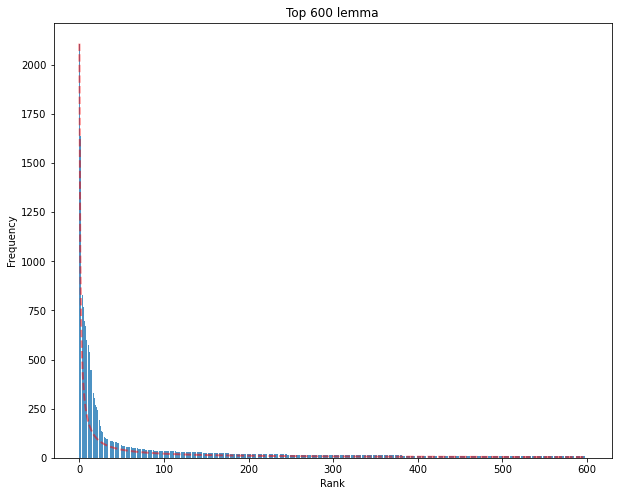

In [7]:
y_pos = np.arange(600)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [v2[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, v2[:600], align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 600 lemma')

From the above graph it is evident that the lemma follows Zipfian distribution.

# Zipfian distribution for white-space separated word

Text(0.5, 1.0, 'Top 600 Tokens')

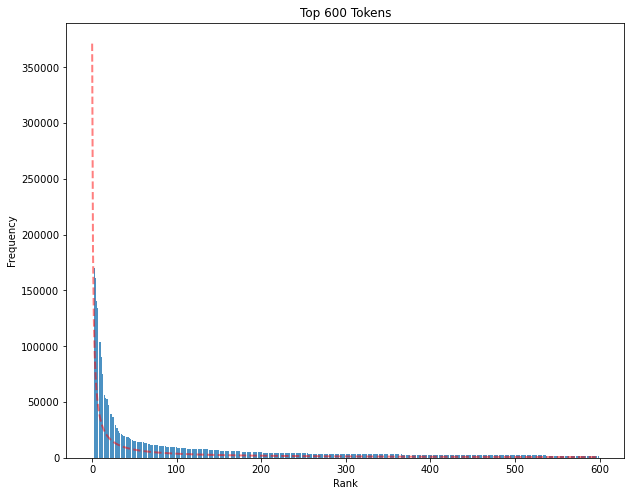

In [34]:
v3 = []
v4 = []
for i in range(len(sorted_token_frequency)-1):
    v3.append(sorted_token_frequency[i][0])
for j in range(len(sorted_token_frequency)-1):
    freq = sorted_token_frequency[j][1]
    v4.append(freq)

y_pos1 = np.arange(600)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf1 = [v4[0]/(i+1)**s for i in y_pos1]
plt.bar(y_pos1, v4[:600], align='center', alpha=0.8)
plt.plot(y_pos1, expected_zipf1, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 600 Tokens')

From the above graph it is evident that the white-space separated word follows Zipfian distribution.

# Zipfian distribution for BPE Tokens

Text(0.5, 1.0, 'Top 4000 Tokens')

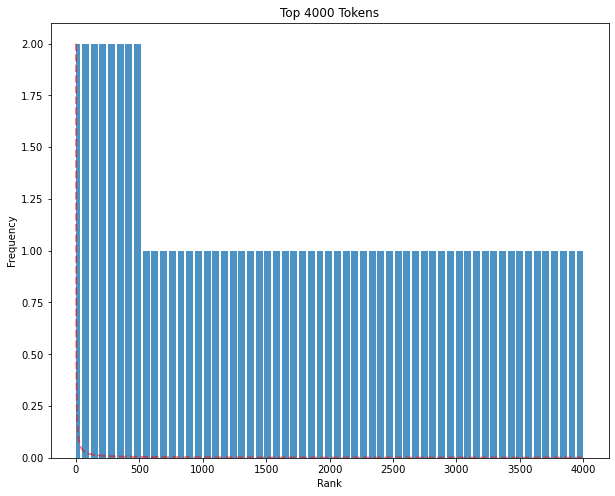

In [35]:

v5 = []
for i in range(len(bpe_5k_sorted_token_frequency)-1):
    v5.append(bpe_5k_sorted_token_frequency[i][1])

y_pos2 = np.arange(4000)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf2 = [v5[0]/(i+1)**s for i in y_pos2]
plt.bar(y_pos2, v5[:4000], align='center', alpha=0.8)
plt.plot(y_pos2, expected_zipf2, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 4000 Tokens')


From the above graph it is evident that the BPE tokens does not follow Zipfian distribution.

#  Zipfian distribution for characters

Text(0.5, 1.0, 'BPE Characters')

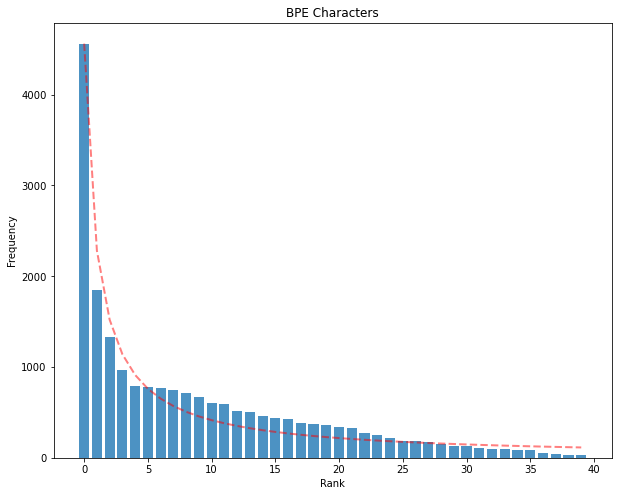

In [48]:
v6 = []
for i in range(len(sorted_bpe_character_frequency)-1):
    v6.append(sorted_bpe_character_frequency[i][1])

y_pos3 = np.arange(40)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf3 = [v6[0]/(i+1)**s for i in y_pos3]
plt.bar(y_pos3, v6[:40], align='center', alpha=0.8)
plt.plot(y_pos3, expected_zipf3, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('BPE Characters')


From the above graph it is evident that the characters almost follows Zipfian distribution.

#  Zipfian distribution for BPE syllables

Text(0.5, 1.0, 'BPE syllables')

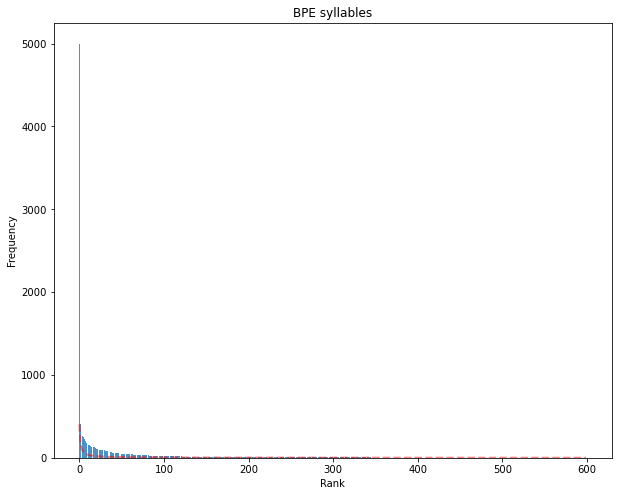

In [47]:
v7= []
for i in range(len(bpe_5k_sorted_syllable_frequency)-1):
    v7.append(bpe_5k_sorted_syllable_frequency[i][1])

y_pos4 = np.arange(600)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf4 = [v7[1]/(i+1)**s for i in y_pos4]
plt.bar(y_pos4, v7[:600], align='center', alpha=0.8)
plt.plot(y_pos4, expected_zipf4, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('BPE syllables')

From the above graph it is evident that the BPE Syllables almost follows Zipfian distribution.

# Question 7

In [5]:
#obtain the list of suffix 
list_of_suffix = []
for form in list_of_form:
    for i in range(len(form)):
        word = form[:len(form)-i]
        if word in list_of_lemma:
            l1 = len(form)-i 
            l2 = len(form)
            suffix = form[l1:l2]
            list_of_suffix.append(suffix)

In [7]:
list_of_suffix  = ' '.join(list_of_suffix).split()
#print(list_of_suffix)
suffix_frequency = {}

# iterating over the list
for item in list_of_suffix:
   # checking the element in dictionary
    if item in suffix_frequency:
      # incrementing the count
      suffix_frequency[item] += 1
    else:
      # initializing the count
        suffix_frequency[item] = 1

# printing the frequency
#print(frequency)
import operator
sorted_suffix_frequency = ( sorted(suffix_frequency.items(), key=operator.itemgetter(1),reverse=True))
v50 = []
for i in range(50):
    v50.append(sorted_suffix_frequency[i][0])
    
#Top 50 suffix......
print("Top 50 suffix:",v50)

Top 50 suffix: ['े', 'ा', 'ों', 'ने', 'ी', 'या', 'ं', 'क', 'हीं', 'ता', 'ते', 'ना', 'ए', 'ई', 'न', 'ीय', 'कर', 'िया', 'ल', '़', 'त', 'ओं', 'थ', 'ती', 'र', '.', 'ह', 'किन', 'ान', 'दी', 'मंत्री', 'ाव', 'िस', 'ाले', 'िए', 'स', 'ाने', 'ाया', 'ें', 'ग', 'य', 'ि', 'ौरान', 'म', 'व', 'ंग्रेस', '्य', 'सभा', 'योग', 'ो']


In [10]:
suffix_from_knowledge = ['टिक', 'होन','लेन ','घट','गाङी ','सुत ','दया ','औना ','नी','ना ','आन','आई ','वट',
'ई','आहट','आव','औती','ना','ई ','य ','ता']

In [11]:
correct_suffix=[]
for suffix in list_of_suffix:
    if suffix in suffix_from_knowledge:
        correct_suffix.append(suffix)
#displaying the correct suffix from the extracted suffix....        
print(correct_suffix)

['ता', 'ता', 'ता', 'ई', 'ता', 'ना', 'ता', 'ता', 'ई', 'ई', 'ई', 'ई', 'ई', 'ई', 'ई', 'ता', 'ता', 'ना', 'ना', 'ता', 'ता', 'ई', 'ता', 'ता', 'ई', 'ई', 'ई', 'ता', 'ना', 'ता', 'ना', 'ना', 'ना', 'ई', 'ता', 'ता', 'ई', 'ता', 'ना', 'ना', 'ना', 'ना', 'ना', 'ई', 'ता', 'ई', 'ता', 'ता', 'ना', 'ना', 'ना', 'ता', 'ना', 'ता', 'ना', 'ता', 'ना', 'ना', 'ना', 'ई', 'नी', 'ना', 'ता', 'ना', 'ता', 'ई', 'ना', 'ना', 'ता', 'नी', 'ना', 'नी', 'ता', 'ता', 'नी', 'ता', 'ता', 'ता', 'ना', 'ता', 'ता', 'ता', 'नी', 'ई', 'ई', 'ई', 'ता', 'ता', 'ना', 'ना', 'ता', 'ई', 'ता', 'ता', 'ता', 'ता', 'ना', 'ई', 'ता', 'ता', 'ना', 'ता', 'ना', 'ना', 'ता', 'ता', 'ता', 'ता', 'ना', 'ना', 'ता', 'ना', 'नी', 'नी', 'ई', 'ता', 'ता', 'ता', 'ता', 'ता', 'ता', 'ता', 'ना', 'ता', 'ता', 'ता', 'ना', 'ना', 'ना', 'ना', 'ना', 'ई', 'ना', 'ना', 'ता', 'ई', 'ना', 'ना', 'ई', 'ई', 'ई', 'वट', 'नी', 'नी', 'ना', 'ता', 'ता', 'ई', 'वट', 'ना', 'ई', 'ई', 'ई', 'ता', 'ई', 'ता', 'ई', 'ता', 'ता', 'ना', 'ना', 'ता', 'ना', 'ना', 'ना', 'ता', 'ई', 'ना', 'ई', 'ना', 'ता', 'ता', 'ई',